In [59]:
%matplotlib inline

import os
import random
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from IPython.display import Audio
from tqdm import tqdm

plt.style.use("dark_background")

In [60]:
set_name = "test"
audio_dir = f"d:\soundofai\\nsynth-guitar-subset\\{set_name}\\audio"
audio_files = [
    os.path.join(audio_dir, x) for x in os.listdir(audio_dir)
    if x.lower().endswith(".wav")
]

In [61]:
def decompose(file_path, margin):
    y, sr = librosa.load(file_path)
    D = librosa.stft(y)

    H, P = librosa.decompose.hpss(D, margin=margin)
    R = D - (H + P)

    return H, P, R, D


def plot_decomposed(file_path, margin=2):
    def plot_spec(y, label, index):
        plt.subplot(3, 1, index + 1)
        librosa.display.specshow(
            librosa.amplitude_to_db(np.abs(y), ref=rp),
            y_axis='log', x_axis='time'
        )
        plt.title(label)

    H, P, R, D = decompose(file_path, margin)

    # Pre-compute a global reference power from the input spectrum
    rp = np.max(np.abs(D))

    plt.figure(figsize=(8, 12))

    for i, (d, label) in enumerate(zip([H, P, R],
                                       ["Harmonic", "Percussive", "Residual"])):
        plot_spec(d, f"{label}, margin={margin}", i)
    plt.show()

guitar_acoustic_021-053-075.wav


d:\miniconda3\envs\ddsp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
d:\miniconda3\envs\ddsp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
d:\miniconda3\envs\ddsp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


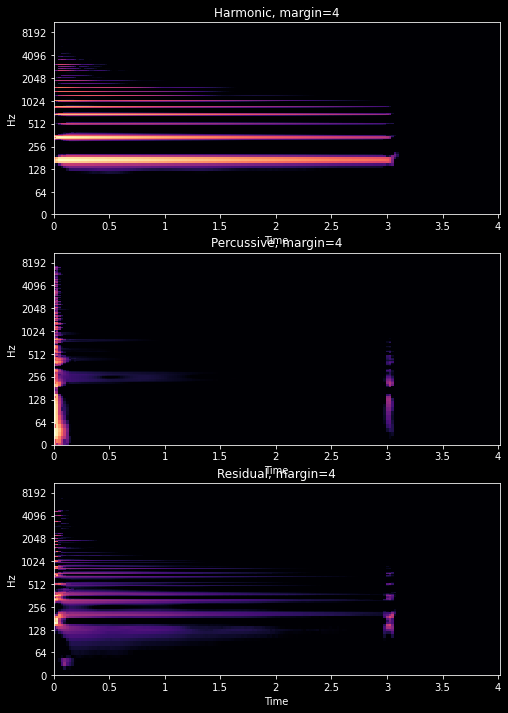

In [93]:
margin = 4
file_path = random.choice(audio_files)
print(os.path.basename(file_path))

plot_decomposed(file_path, margin)

In [94]:
H, P, R, D = decompose(file_path, margin)

In [95]:
h_energy = np.mean(np.abs(H))
r_energy = np.mean(np.abs(R))
p_energy = np.mean(np.abs(P))

In [96]:
print(h_energy)
print(r_energy)
print(p_energy)

print(r_energy / h_energy)

0.20251372
0.00840355
0.013998919
0.0414962


In [90]:
Audio(filename=file_path, rate=16000)

In [97]:
threshold = 0.5
epsilon = 1e-6


with open(f"{set_name}_ratio_over_{threshold:0.2f}.csv", "w") as f:
    for audio_file in tqdm(audio_files):
        H, P, R, D = decompose(audio_file, margin)
        h_energy = np.mean(np.abs(H))
        r_energy = np.mean(np.abs(R))
        p_energy = np.mean(np.abs(P))

        if h_energy > p_energy:
            ratio = (r_energy + epsilon) / (h_energy + epsilon)

            if ratio > threshold:
                f.write(f"{os.path.basename(audio_file)}\n")

100%|██████████| 652/652 [02:04<00:00,  5.25it/s]


In [98]:
high_ratio_files = []

with open(f"{set_name}_ratio_over_{threshold:0.2f}.csv", "r") as f:
    high_ratio_files += f.read().splitlines()

In [105]:
file_path = os.path.join(audio_dir, random.choice(high_ratio_files))

Audio(file_path, rate=16000)